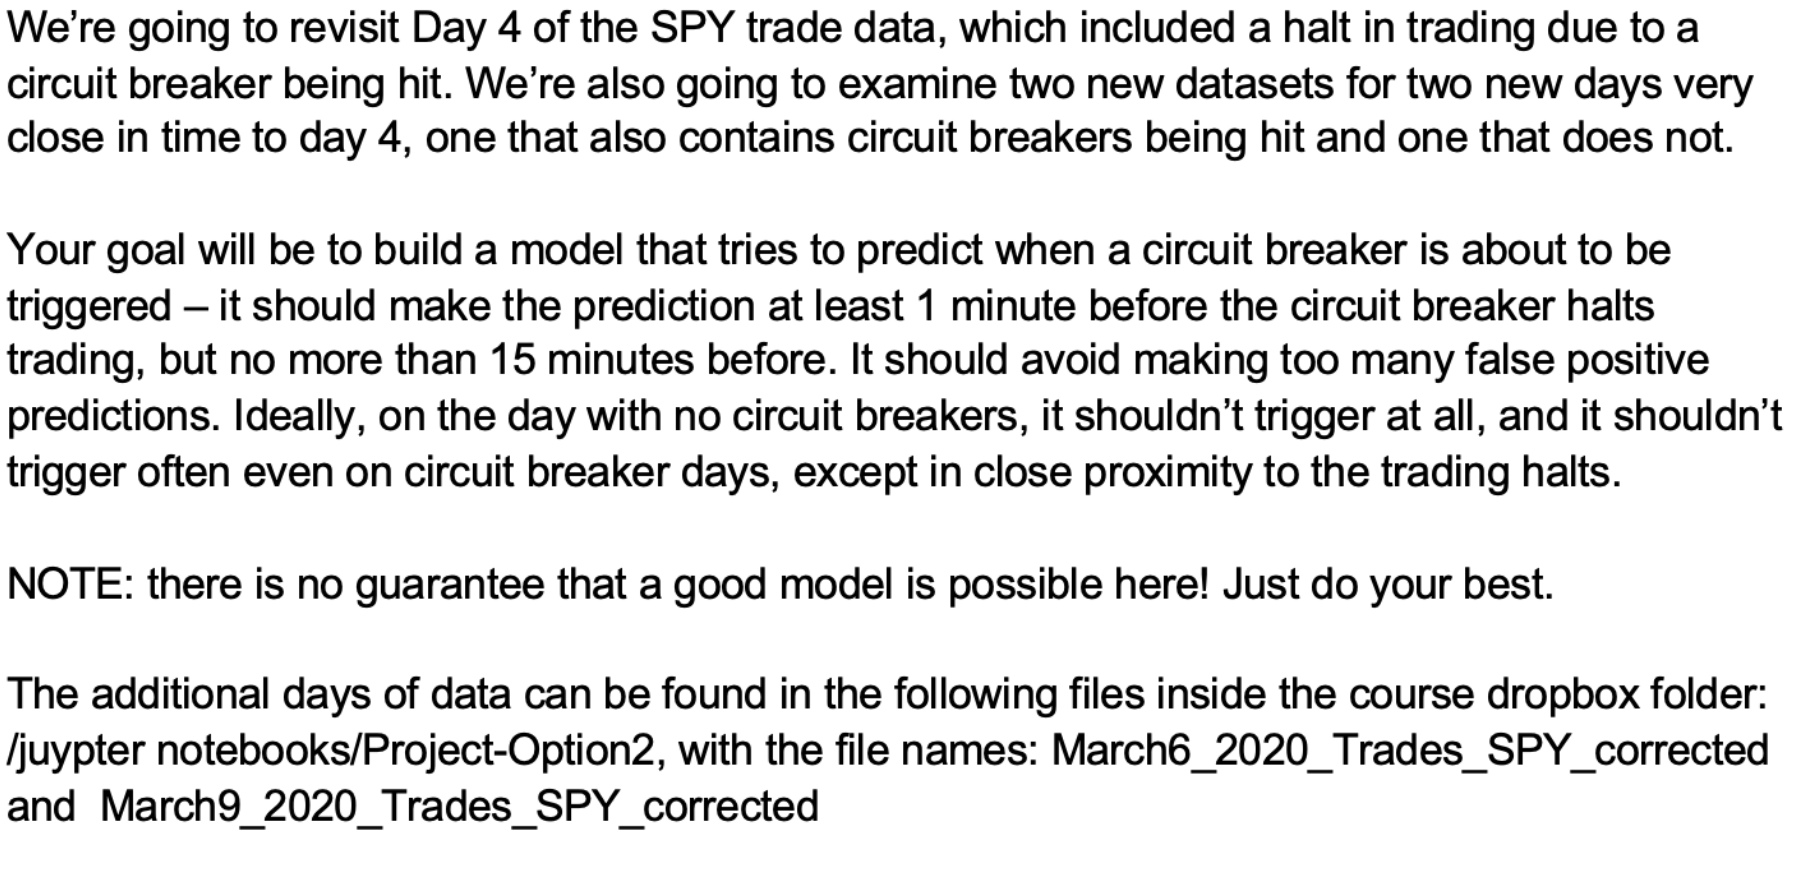

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# loading with index on Time column so that it is easier to resample the data by larger periods of time
d4 = pd.read_csv('Day4_Trades_SPY.csv', parse_dates = ['Time'], index_col = 'Time')
m6 = pd.read_csv('March6_2020_Trades_SPY_corrected.csv', parse_dates = ['Time'], index_col = 'Time')
m9 = pd.read_csv('March9_2020_Trades_SPY_corrected.csv', parse_dates = ['Time'], index_col = 'Time')

In [44]:
# resampling each dataframe by minute and calculating price mettrics
d42 = d4['PRICE'].resample('1min').agg({'min_price':min, 'max_price': max })
m62 = m6['PRICE'].resample('1min').agg({'min_price':min, 'max_price': max })
m92 = m9['PRICE'].resample('1min').agg({'min_price':min, 'max_price': max })

dfs = [d42, m62, m92]

In [45]:
# doing the same for the size metrics
s4 = d4['SIZE'].resample('1min').agg(num_trades = 'size',
                                     volume = 'sum',)
s4.reset_index(inplace = True, drop = True)

s6 = m6['SIZE'].resample('1min').agg(num_trades = 'size',
                                     volume = 'sum',)
s6.reset_index(inplace = True, drop = True)

s9 = m9['SIZE'].resample('1min').agg(num_trades = 'size',
                                     volume = 'sum',)

s9.reset_index(inplace = True, drop = True)

sizes = [s4, s6, s9]

In [46]:
# labels for each day of data to keep track of them
days = ['d4', 'm6', 'm9']

# loop over dfs and create additional columns in each
for ind, d in enumerate(dfs):
    # adding a column for hours
    d['hour'] = d.index.hour.astype(int)
    # adding a column for minutes
    d['minute'] = d.index.minute.astype(int)
    # adding a column for seconds

    # adding count of minutes since midnight
    d['minute_num'] = d.hour * 60 + d.minute

    #adding a label as a string for time series charts in 'HH:MM' format
    d['label'] = d.hour.astype(str) + ':' + d.index.strftime('%M')

    # calculate delta between min and max price for each minute
    d['price_gap'] = d['max_price'] - d['min_price']
    
    d['day'] = days[ind]

    #resetting the index
    d.reset_index(inplace = True)
    
    # reaplace values in dfs with the modified version of each dataframe
    dfs[ind] = d

In [47]:
# concatenate each day with count of trades info
for ind, d in enumerate(dfs):
    d = pd.concat([d, sizes[ind]], axis = 1)
    
    dfs[ind] = d

In [48]:
d42 = dfs[0]
m62 = dfs[1]
m92 = dfs[2]

In [49]:
# d42.head(6)

In [50]:
m62.head(6)

,Time,min_price,max_price,hour,minute,minute_num,label,price_gap,day,num_trades,volume
0,2022-12-17 09:30:00,292.20,293.67,9,30,570,9:30,1.47,m6,8087,1594303
1,2022-12-17 09:31:00,292.52,293.70,9,31,571,9:31,1.18,m6,9435,1348177
2,2022-12-17 09:32:00,292.76,294.44,9,32,572,9:32,1.68,m6,8049,1144265
3,2022-12-17 09:33:00,293.44,294.75,9,33,573,9:33,1.31,m6,7916,843035
4,2022-12-17 09:34:00,292.72,294.75,9,34,574,9:34,2.03,m6,10244,1057013
5,2022-12-17 09:35:00,293.03,294.31,9,35,575,9:35,1.28,m6,10844,989432


In [51]:
m62.tail(6)

,Time,min_price,max_price,hour,minute,minute_num,label,price_gap,day,num_trades,volume
385,2022-12-17 15:55:00,296.72,297.95,15,55,955,15:55,1.23,m6,8821,1898441
386,2022-12-17 15:56:00,296.80,297.99,15,56,956,15:56,1.19,m6,8861,1612242
387,2022-12-17 15:57:00,297.32,299.05,15,57,957,15:57,1.73,m6,16903,2949164
388,2022-12-17 15:58:00,297.31,298.55,15,58,958,15:58,1.24,m6,13887,2473486
389,2022-12-17 15:59:00,296.65,298.23,15,59,959,15:59,1.58,m6,14335,3117437
390,2022-12-17 16:00:00,297.03,297.71,16,0,960,16:00,0.68,m6,109,2551557


In [52]:
m92.head(6)

,Time,min_price,max_price,hour,minute,minute_num,label,price_gap,day,num_trades,volume
0,2022-12-17 09:30:00,274.80,276.47,9,30,570,9:30,1.67,m9,12096,2420467
1,2022-12-17 09:31:00,275.19,276.55,9,31,571,9:31,1.36,m9,9577,870017
2,2022-12-17 09:32:00,275.27,277.22,9,32,572,9:32,1.95,m9,12423,1283640
3,2022-12-17 09:33:00,276.01,277.12,9,33,573,9:33,1.11,m9,8552,969580
4,2022-12-17 09:34:00,276.04,276.78,9,34,574,9:34,0.74,m9,1644,171593
5,2022-12-17 09:35:00,NaN,NaN,9,35,575,9:35,NaN,m9,0,0


In [53]:
# filling the gaps with zeros (if any):
for d in dfs:   
    # filling missing values with zeros for all metrics (in order to visualize the gap)
    d.fillna(0, inplace = True)

In [54]:
# no circuitbreakers hit on March 6
m62[m62['min_price'] == 0]

,Time,min_price,max_price,hour,minute,minute_num,label,price_gap,day,num_trades,volume


In [55]:
# but the trading did halt at 9:35 on March 9
m92[m92['min_price'] == 0]

,Time,min_price,max_price,hour,minute,minute_num,label,price_gap,day,num_trades,volume
5,2022-12-17 09:35:00,0.0,0.0,9,35,575,9:35,0.0,m9,0,0
6,2022-12-17 09:36:00,0.0,0.0,9,36,576,9:36,0.0,m9,0,0
7,2022-12-17 09:37:00,0.0,0.0,9,37,577,9:37,0.0,m9,0,0
8,2022-12-17 09:38:00,0.0,0.0,9,38,578,9:38,0.0,m9,0,0
9,2022-12-17 09:39:00,0.0,0.0,9,39,579,9:39,0.0,m9,0,0
10,2022-12-17 09:40:00,0.0,0.0,9,40,580,9:40,0.0,m9,0,0
11,2022-12-17 09:41:00,0.0,0.0,9,41,581,9:41,0.0,m9,0,0
12,2022-12-17 09:42:00,0.0,0.0,9,42,582,9:42,0.0,m9,0,0
13,2022-12-17 09:43:00,0.0,0.0,9,43,583,9:43,0.0,m9,0,0
14,2022-12-17 09:44:00,0.0,0.0,9,44,584,9:44,0.0,m9,0,0


In [56]:
# get the indeces for the start and end of the gap in the data
gap_start_ind = m92[m92['min_price'] == 0].index.min()
gap_end_ind = m92[m92['min_price'] == 0].index.max()

# checking the section with the missing data, plus one row on each side for comparison
m92[gap_start_ind-5:gap_start_ind+2]

,Time,min_price,max_price,hour,minute,minute_num,label,price_gap,day,num_trades,volume
0,2022-12-17 09:30:00,274.80,276.47,9,30,570,9:30,1.67,m9,12096,2420467
1,2022-12-17 09:31:00,275.19,276.55,9,31,571,9:31,1.36,m9,9577,870017
2,2022-12-17 09:32:00,275.27,277.22,9,32,572,9:32,1.95,m9,12423,1283640
3,2022-12-17 09:33:00,276.01,277.12,9,33,573,9:33,1.11,m9,8552,969580
4,2022-12-17 09:34:00,276.04,276.78,9,34,574,9:34,0.74,m9,1644,171593
5,2022-12-17 09:35:00,0.00,0.00,9,35,575,9:35,0.00,m9,0,0
6,2022-12-17 09:36:00,0.00,0.00,9,36,576,9:36,0.00,m9,0,0


#### The circuitbreaker hit only after 4 full minutes of trading. We will first check if something happened in those four minutes and will also compare day over day data using March 6 as the data for the previous day.

In [57]:
# trying to implement the function offered in the class just to see what the result may look like
def modelTrigger(num_trades,price_gap):
    if(price_gap > 1.5):
        if(num_trades > 8000):
            return 1
    return 0

m92['Trigger'] = m92.apply(lambda x: modelTrigger(x['num_trades'],x['price_gap']),axis=1)
# m92['Trigger'].head(10)
m92[m92['Trigger']==1].head(10)
# m92.head(10)

,Time,min_price,max_price,hour,minute,minute_num,label,price_gap,day,num_trades,volume,Trigger
0,2022-12-17 09:30:00,274.80,276.47,9,30,570,9:30,1.67,m9,12096,2420467,1
2,2022-12-17 09:32:00,275.27,277.22,9,32,572,9:32,1.95,m9,12423,1283640,1
19,2022-12-17 09:49:00,274.21,276.55,9,49,589,9:49,2.34,m9,12967,1062718,1
20,2022-12-17 09:50:00,273.24,276.53,9,50,590,9:50,3.29,m9,16516,1542630,1
21,2022-12-17 09:51:00,275.09,278.02,9,51,591,9:51,2.93,m9,15699,1358973,1
22,2022-12-17 09:52:00,275.34,277.14,9,52,592,9:52,1.80,m9,8025,603034,1
23,2022-12-17 09:53:00,276.32,278.65,9,53,593,9:53,2.33,m9,14847,1128563,1
25,2022-12-17 09:55:00,277.33,280.27,9,55,595,9:55,2.94,m9,10426,966445,1
26,2022-12-17 09:56:00,275.42,281.94,9,56,596,9:56,6.52,m9,10767,1108586,1
27,2022-12-17 09:57:00,275.50,281.56,9,57,597,9:57,6.06,m9,9367,1021706,1


#### It appears that a combination of two filters that worked previously returned way to many false positives this time predicting a circutbreaker hit multiple times (when it didn't happen).

### Let's try zooming in and resample the data by 10-second period for visualization in order to identify combinations of filters that may work better in flagging the period leading up to the circuitbreaker being triggered.

In [58]:
# zooming into a short period of time around the spike for ease of comutation
m9Sec = m9.copy()
m9Sec.fillna(0, inplace = True)


m9Price10Sec = m9Sec['PRICE'].resample('10s').agg({'min_price':min, 'max_price': max })
# calculate delta between min and max price for each minute
m9Price10Sec['price_gap'] = m9Price10Sec['max_price'] - m9Price10Sec['min_price']
m9Price10Sec = m9Price10Sec.between_time('09:30', '09:35')
m9Price10Sec['label'] = m9Price10Sec.index.hour.astype(str) + ':' + m9Price10Sec.index.strftime('%M')+ ':' + m9Price10Sec.index.strftime('%S')
m9Price10Sec.reset_index(inplace = True, drop = True)
m9Price10Sec

m9Size10Sec = m9Sec['SIZE'].resample('10s').agg(volume = 'sum', num_trades = 'size')
m9Size10Sec = m9Size10Sec.between_time('09:30', '09:35')
m9Size10Sec.reset_index(inplace = True, drop = True)

# concatenate 2 DFS
m9_10Sec = pd.concat([m9Price10Sec, m9Size10Sec, ], axis = 1)


In [59]:
# loop over numeric columns and create line plots
for col in ['min_price', 'volume', 'num_trades', 'price_gap']:
    
    fig = px.line(m9_10Sec, 
                  x='label', 
                  y=[col],
                 width=800, height=400)

    fig.show()

In [60]:
# modifying the thresholds for the price gap and number of trades to better fit new data
# and adding an extra condition to the function offered in the class to take volume into account
def modelTrigger2(num_trades,price_gap, volume):
    if(price_gap > 1.7):
        if(num_trades > 3000):
            if(volume > 220000):
                return 1
    return 0

# Checking how the modified trigger works on March 9 data
m9_10Sec['Trigger'] = m9_10Sec.apply(lambda x: modelTrigger2(x['num_trades'],x['price_gap'],x['volume']),axis=1)
# m92['Trigger'].head(10)
m9_10Sec[m9_10Sec['Trigger']==1].head(10)
# m92.head(10)

,min_price,max_price,price_gap,label,volume,num_trades,Trigger
13,275.36,277.13,1.77,9:32:10,263588,3435,1


### Our function predicted the circuitbreaker to hit at 9:32 while in reality it happened at 9:34 or within 2 minutes from the predicted time

### Let's check how the same function would work on March 6 data when the circuitbreaker was not triggered

In [61]:
# zooming into a short period of time around the spike for ease of comutation
m6Sec = m6.copy()
m6Sec.fillna(0, inplace = True)


m6Price10Sec = m6Sec['PRICE'].resample('10s').agg({'min_price':min, 'max_price': max })
# calculate delta between min and max price for each minute
m6Price10Sec['price_gap'] = m6Price10Sec['max_price'] - m6Price10Sec['min_price']
m6Price10Sec['label'] = m6Price10Sec.index.hour.astype(str) + ':' + m6Price10Sec.index.strftime('%M')+ ':' + m6Price10Sec.index.strftime('%S')
m6Price10Sec.reset_index(inplace = True, drop = True)
m6Price10Sec

m6Size10Sec = m6Sec['SIZE'].resample('10s').agg(volume = 'sum', num_trades = 'size')
m6Size10Sec.reset_index(inplace = True, drop = True)

# concatenate 2 DFS
m6_10Sec = pd.concat([m6Price10Sec, m6Size10Sec, ], axis = 1)

m6_10Sec['Trigger'] = m6_10Sec.apply(lambda x: modelTrigger2(x['num_trades'],x['price_gap'],x['volume']),axis=1)
# m92['Trigger'].head(10)
m6_10Sec[m6_10Sec['Trigger']==1].head(10)


,min_price,max_price,price_gap,label,volume,num_trades,Trigger


### No false positives, so our set of filters works as intended

## Below are some fruitless attempts of looking at the data at a more granular level
### I think the solution in the previous section works fine for the task but decided to leave the results of the below exploration just for the information

### Resampling the data by second

In [21]:
# zooming into a short period of time around the spike for ease of comutation
m9Sec = m9.copy()
m9Sec.fillna(0, inplace = True)


m9PriceSec = m9Sec['PRICE'].resample('1s').agg({'min_price':min, 'max_price': max })
m9PriceSec = m9PriceSec.between_time('09:30', '09:35')
m9PriceSec['label'] = m9PriceSec.index.hour.astype(str) + ':' + m9PriceSec.index.strftime('%M')+ ':' + m9PriceSec.index.strftime('%S')
m9PriceSec.reset_index(inplace = True, drop = True)
m9PriceSec

m9SizeSec = m9Sec['SIZE'].resample('1s').agg(volume = 'sum', num_trades = 'size')
m9SizeSec = m9SizeSec.between_time('09:30', '09:35')
m9SizeSec.reset_index(inplace = True, drop = True)

In [22]:
# concatenate 2 DFS
m9Sec = pd.concat([m9PriceSec, m9SizeSec, ], axis = 1)

In [23]:
# concatenate 2 DFS
m9Sec = pd.concat([m9PriceSec, m9SizeSec, ], axis = 1)

In [24]:
# calculate delta between min and max price for each minute
m9Sec['price_gap'] = m9Sec['max_price'] - m9Sec['min_price']

# adding rolling 60s count_trades
m9Sec['num_trades60s'] = m9Sec['num_trades'].rolling(60).sum()
m9Sec['volume60s'] = m9Sec['volume'].rolling(60).sum()
m9Sec['price_gap60s'] = m9Sec['price_gap'].rolling(60).sum()

In [25]:
# m9Sec.loc[50:90]

In [27]:
# filling missing values with zeros for all metrics (in order to visualize the gap)
m9Sec.fillna(0, inplace = True)

# m9Sec.head()

In [28]:
# get the indeces for the start and end of the gap in the data
gap_start_ind = m9Sec[m9Sec['min_price'] == 0].index.min()
gap_end_ind = m9Sec[m9Sec['min_price'] == 0].index.max()

# checking the section around the halt
m9Sec[gap_start_ind-10:gap_start_ind+2]

,min_price,max_price,label,volume,num_trades,price_gap,num_trades60s,volume60s,price_gap60s
244,276.15,276.69,9:34:04,14214,117,0.54,8139.0,888844.0,35.18
245,276.10,276.67,9:34:05,18364,112,0.57,8050.0,894853.0,35.10
246,276.07,276.66,9:34:06,20080,242,0.59,8216.0,908437.0,35.10
247,276.06,276.65,9:34:07,2718,67,0.59,8201.0,904220.0,35.09
248,276.04,276.64,9:34:08,20082,202,0.60,8124.0,873156.0,35.02
249,276.06,276.61,9:34:09,10676,101,0.55,8155.0,876780.0,35.04
250,276.09,276.62,9:34:10,5766,73,0.53,8089.0,865014.0,34.96
251,276.10,276.63,9:34:11,4856,53,0.53,8043.0,859870.0,34.92
252,276.07,276.64,9:34:12,25209,137,0.57,8111.0,879017.0,34.86
253,276.10,276.62,9:34:13,842,11,0.52,8030.0,870647.0,34.83


In [29]:
# getting the label for the max volume in HH:MM:SS format
m9Sec[m9Sec['volume'] == m9Sec['volume'].max()][['label', 'num_trades', 'volume', 'price_gap']]

,label,num_trades,volume,price_gap
0,9:30:00,652,1377889,0.9


In [30]:
# getting the label for the max num of trades in HH:MM:SS format
m9Sec[m9Sec['num_trades'] == m9Sec['num_trades'].max()][['label', 'num_trades', 'volume', 'price_gap']]

,label,num_trades,volume,price_gap
137,9:32:17,991,55423,0.83


In [31]:
# getting the label for the max delta in price in HH:MM:SS format
m9Sec[m9Sec['price_gap'] == m9Sec['price_gap'].max()][['label', 'num_trades', 'volume', 'price_gap']]


,label,num_trades,volume,price_gap
152,9:32:32,217,20889,1.67


In [32]:
# look at top 10 values with the highest price gap
m9Sec.sort_values(by = ['price_gap'], ascending = False).head(10)

,min_price,max_price,label,volume,num_trades,price_gap,num_trades60s,volume60s,price_gap60s
152,275.55,277.22,9:32:32,20889,217,1.67,11909.0,1052011.0,39.35
170,275.27,276.83,9:32:50,26503,198,1.56,12290.0,1167372.0,42.73
177,275.41,276.90,9:32:57,25991,127,1.49,12182.0,1235746.0,43.57
134,275.36,276.77,9:32:14,13510,151,1.41,10072.0,920245.0,38.27
159,275.49,276.88,9:32:39,14371,105,1.39,12824.0,1150567.0,41.28
153,275.84,277.19,9:32:33,30851,289,1.35,12152.0,1079775.0,40.17
160,275.61,276.83,9:32:40,78795,517,1.22,12909.0,1204979.0,41.66
13,274.80,275.96,9:30:13,49424,579,1.16,0.0,0.0,0.00
12,274.97,276.12,9:30:12,34517,481,1.15,0.0,0.0,0.00
69,275.36,276.51,9:31:09,27116,232,1.15,10855.0,970552.0,43.48


In [33]:
# look at top 10 values with the highest rolling number of trades
m9Sec.sort_values(by = ['num_trades60s'], ascending = False).head(10)

,min_price,max_price,label,volume,num_trades,price_gap,num_trades60s,volume60s,price_gap60s
167,276.22,276.84,9:32:47,19884,209,0.62,12918.0,1241059.0,41.92
168,276.24,276.81,9:32:48,13741,173,0.57,12911.0,1229053.0,41.90
160,275.61,276.83,9:32:40,78795,517,1.22,12909.0,1204979.0,41.66
188,276.13,276.80,9:33:08,51146,279,0.67,12895.0,1360030.0,43.94
161,276.02,276.77,9:32:41,12299,167,0.75,12895.0,1206588.0,41.78
183,276.35,276.92,9:33:03,30646,181,0.57,12876.0,1353047.0,44.18
186,276.17,276.76,9:33:06,6496,76,0.59,12851.0,1346575.0,44.01
185,276.21,276.86,9:33:05,12355,201,0.65,12844.0,1355312.0,44.28
159,275.49,276.88,9:32:39,14371,105,1.39,12824.0,1150567.0,41.28
187,276.14,276.74,9:33:07,6935,82,0.60,12815.0,1341415.0,44.02


In [34]:
# getting the label for the max rolling delta in price in HH:MM:SS format
m9Sec[m9Sec['price_gap60s'] == m9Sec['price_gap60s'].max()][['label', 'num_trades', 'volume', 'price_gap', 'price_gap60s']]


,label,num_trades,volume,price_gap,price_gap60s
185,9:33:05,201,12355,0.65,44.28


In [35]:
# see how we were getting there
m9Sec.sort_values(by = ['price_gap60s'], ascending = False).head()

,min_price,max_price,label,volume,num_trades,price_gap,num_trades60s,volume60s,price_gap60s
185,276.21,276.86,9:33:05,12355,201,0.65,12844.0,1355312.0,44.28
184,276.31,276.86,9:33:04,20573,54,0.55,12787.0,1358529.0,44.20
183,276.35,276.92,9:33:03,30646,181,0.57,12876.0,1353047.0,44.18
182,276.36,277.12,9:33:02,12488,128,0.76,12811.0,1333322.0,44.16
181,276.37,277.11,9:33:01,16451,126,0.74,12786.0,1331374.0,44.06


In [36]:
# getting the label for the max rolling delta in price in HH:MM:SS format
m9Sec[m9Sec['num_trades'] == m9Sec['num_trades'].max()][['label', 'num_trades', 'num_trades60s', 'volume', 'volume60s', 'price_gap', 'price_gap60s']]

,label,num_trades,num_trades60s,volume,volume60s,price_gap,price_gap60s
137,9:32:17,991,11035.0,55423,946813.0,0.83,38.63


In [37]:
# getting the label for the max rolling delta in price in HH:MM:SS format
m9Sec[m9Sec['num_trades60s'] == m9Sec['num_trades60s'].max()][['label', 'num_trades', 'num_trades60s', 'volume', 'volume60s', 'price_gap', 'price_gap60s']]


,label,num_trades,num_trades60s,volume,volume60s,price_gap,price_gap60s
167,9:32:47,209,12918.0,19884,1241059.0,0.62,41.92


In [38]:
# see how we were getting there
m9Sec.sort_values(by = ['num_trades60s'], ascending = False).head()[['label', 'num_trades', 'num_trades60s', 'volume', 'volume60s', 'price_gap', 'price_gap60s']]

,label,num_trades,num_trades60s,volume,volume60s,price_gap,price_gap60s
167,9:32:47,209,12918.0,19884,1241059.0,0.62,41.92
168,9:32:48,173,12911.0,13741,1229053.0,0.57,41.90
160,9:32:40,517,12909.0,78795,1204979.0,1.22,41.66
188,9:33:08,279,12895.0,51146,1360030.0,0.67,43.94
161,9:32:41,167,12895.0,12299,1206588.0,0.75,41.78


In [39]:
m9Sec.sort_values(by = ['num_trades'], ascending = False).head(10)

,min_price,max_price,label,volume,num_trades,price_gap,num_trades60s,volume60s,price_gap60s
137,276.30,277.13,9:32:17,55423,991,0.83,11035.0,946813.0,38.63
10,275.22,276.15,9:30:10,51375,834,0.93,0.0,0.0,0.00
0,274.90,275.80,9:30:00,1377889,652,0.90,0.0,0.0,0.00
42,275.06,276.00,9:30:42,33320,636,0.94,0.0,0.0,0.00
1,275.08,275.74,9:30:01,33064,631,0.66,0.0,0.0,0.00
13,274.80,275.96,9:30:13,49424,579,1.16,0.0,0.0,0.00
180,276.31,277.10,9:33:00,63578,570,0.79,12787.0,1321824.0,43.87
110,275.59,276.33,9:31:50,46059,540,0.74,9919.0,900708.0,40.35
160,275.61,276.83,9:32:40,78795,517,1.22,12909.0,1204979.0,41.66
156,276.32,277.11,9:32:36,47213,517,0.79,12405.0,1102644.0,40.29


### Comparing March 9 price with the last recorded price on the previous available day

In [40]:
m9Sec['dod_min_price'] = m9Sec['min_price'] - m62.min_price.iloc[-1]
m9Sec.head()

,min_price,max_price,label,volume,num_trades,price_gap,num_trades60s,volume60s,price_gap60s,dod_min_price
0,274.90,275.80,9:30:00,1377889,652,0.90,0.0,0.0,0.0,-22.13
1,275.08,275.74,9:30:01,33064,631,0.66,0.0,0.0,0.0,-21.95
2,274.98,275.76,9:30:02,21026,357,0.78,0.0,0.0,0.0,-22.05
3,275.04,275.76,9:30:03,25849,277,0.72,0.0,0.0,0.0,-21.99
4,275.15,275.76,9:30:04,11189,131,0.61,0.0,0.0,0.0,-21.88


In [41]:
m9Sec[gap_start_ind-10:gap_start_ind+2]

,min_price,max_price,label,volume,num_trades,price_gap,num_trades60s,volume60s,price_gap60s,dod_min_price
244,276.15,276.69,9:34:04,14214,117,0.54,8139.0,888844.0,35.18,-20.88
245,276.10,276.67,9:34:05,18364,112,0.57,8050.0,894853.0,35.10,-20.93
246,276.07,276.66,9:34:06,20080,242,0.59,8216.0,908437.0,35.10,-20.96
247,276.06,276.65,9:34:07,2718,67,0.59,8201.0,904220.0,35.09,-20.97
248,276.04,276.64,9:34:08,20082,202,0.60,8124.0,873156.0,35.02,-20.99
249,276.06,276.61,9:34:09,10676,101,0.55,8155.0,876780.0,35.04,-20.97
250,276.09,276.62,9:34:10,5766,73,0.53,8089.0,865014.0,34.96,-20.94
251,276.10,276.63,9:34:11,4856,53,0.53,8043.0,859870.0,34.92,-20.93
252,276.07,276.64,9:34:12,25209,137,0.57,8111.0,879017.0,34.86,-20.96
253,276.10,276.62,9:34:13,842,11,0.52,8030.0,870647.0,34.83,-20.93
